In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import tree 
from sklearn.model_selection import LearningCurveDisplay

In [107]:
x_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt") 
x_test = np.loadtxt("../test/X_test.txt")
y_test = np.loadtxt("../test/y_test.txt")

### Naive Bayes Classification
It's no surprise than naive classification isn't doing a great job, after all it's "naive". The assumption here is that generative model for classes is guassian. It is still surprising that with this simplification, there's still 77% accuracy. 

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
test_pred = gnb.fit(x_train, y_train).predict(x_test)
np.sum(test_pred == y_test) / len(y_test) * 100 

77.02748557855446

### Decision Tree Classifier

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
test_pred = clf.predict(x_test)
np.sum(test_pred == y_test) / len(y_test) * 100 

85.98574821852732

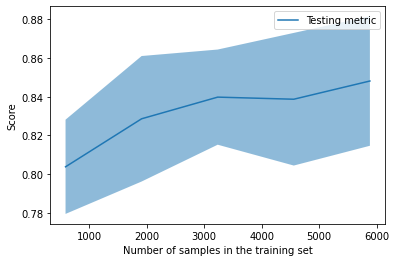

In [11]:
LearningCurveDisplay.from_estimator(clf, x_train, y_train);

### KNN 

In [34]:
from sklearn.neighbors import KNeighborsClassifier;
kng = KNeighborsClassifier(); 
test_pred = kng.fit(x_train, y_train).predict(x_test); 
np.sum(test_pred == y_test) / len(y_test) * 100 ;

86.04210939759076

### SVM 
SVM outperforms all the previous methods. SVM used to be the-off-the-shelve algorithm in machine learning before the rise of neural networks.

In [110]:
from sklearn import svm 
svc = svm.SVC()
test_pred = svc.fit(x_train, y_train).predict(x_test)
np.sum(test_pred == y_test) / len(y_test) * 100 

95.04580929759076

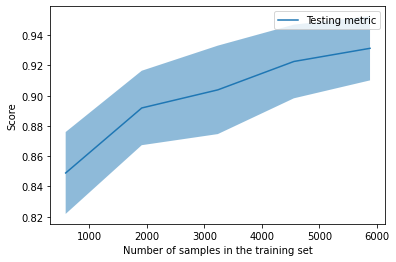

In [113]:
LearningCurveDisplay.from_estimator(svc, x_train, y_train);

### Linear Classification
Linear Classification uses softmax and stochastic gradient descent to learn weights of a linear function. It does a better job than SVM, but note that we didn't tune the hyperparameters in SVM. 

In [108]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha=1e-3, max_iter=100)
test_pred = sgd.fit(x_train, y_train).predict(x_test)
np.sum(test_pred == y_test) / len(y_test) * 100 

95.72446555819477

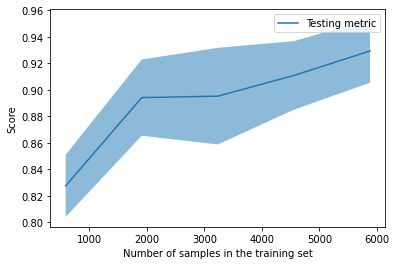

In [109]:
LearningCurveDisplay.from_estimator(sgd, x_train, y_train);

### MLP 
We first use a MLP with only 100 hidden layers with relu activation function. It uses adam optimizer and L2 regularization. You can see that the model is overfitting data, with training accuracy of 100% while test accuracy is 94%. We can get better results by using dropout. 

In [112]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (100))
mlp = mlp.fit(x_train, y_train)
test_ac = np.sum(mlp.predict(x_test) == y_test) / len(y_test) * 100, 
train_ac = np.sum(mlp.predict(x_train) == y_train) / len(y_train) * 100 
test_ac, train_ac

((95.18154054971157,), 100.0)